### Here we analyze and plot the HMC chains

In [196]:
%pylab inline
name_str = 'WrongYield'
name_str2 = 'TNG' # only used for initial plots
name_str3 = 'WrongYield' # only used for initial plots
dat=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG/chains/%s_HMC_Full_v5_n200.npz'%name_str)
dat2=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG/chains/%s_HMC_Full_v5_n200.npz'%name_str2)
dat3=np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG/chains/%s_HMC_Full_v5_n200.npz'%name_str3)

Populating the interactive namespace from numpy and matplotlib


In [197]:
n_stars = dat.f.n_stars

In [198]:
std_times=[]
mean_times=[]
all_runtimes=dat.f.runtimes
for i in range(len(all_runtimes)):
    std_times.append(np.std(all_runtimes[i]))
    mean_times.append(np.mean(all_runtimes[i]))

In [199]:
std_times2=[]
mean_times2=[]
all_runtimes2=dat2.f.runtimes
for i in range(len(all_runtimes2)):
    std_times2.append(np.std(all_runtimes2[i]))
    mean_times2.append(np.mean(all_runtimes2[i]))

In [200]:
std_times3=[]
mean_times3=[]
all_runtimes3=dat3.f.runtimes
for i in range(len(all_runtimes3)):
    std_times3.append(np.std(all_runtimes3[i]))
    mean_times3.append(np.mean(all_runtimes3[i]))

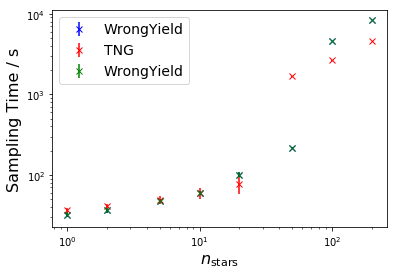

In [201]:
plt.errorbar(n_stars,mean_times,std_times,marker='x',ls='',label=r'%s'%name_str,c='b')
plt.errorbar(n_stars,mean_times2,std_times2,marker='x',ls='',label=r'%s'%name_str2,c='r')
plt.errorbar(n_stars,mean_times3,std_times3,marker='x',ls='',label=r'%s'%name_str3,c='g')
plt.xlabel(r'$n_\mathrm{stars}$',fontsize=16);plt.ylabel('Sampling Time / s',fontsize=16);
plt.legend(fontsize=14);
plt.xscale('log');plt.yscale('log');

### Plot Global Parameters

In [202]:
true=[-2.3,-2.89]

In [203]:
all_Lambdas = dat.f.Lambdas

In [204]:
for this_n in [1,10,100]:
    ind = np.where(this_n==n_stars)[0][0]
    this_Lambdas = all_Lambdas[ind]
    medians = np.asarray([np.median(thisL,axis=0) for thisL in this_Lambdas])
    lows = np.asarray([np.percentile(thisL,15.865,axis=0) for thisL in this_Lambdas])
    highs = np.asarray([np.percentile(thisL,100.-15.865,axis=0) for thisL in this_Lambdas])
    for i in range(2):
        med = np.median(medians[:,i])
        up = np.median(highs[:,i])
        lo = np.median(lows[:,i])
        up2 = np.percentile(medians[:,i],100.-15.865)
        lo2 = np.percentile(medians[:,i],15.865)
        if i==0:
            print("$%d$ &"%this_n)
        print(" $%.2f$ & $^{+%.2f}_{-%.2f}$ & $^{+%.2f}_{-%.2f}$"%(med,up-med,med-lo,up2-med,med-lo2))
        if i==1:
            print(" \\\\")
        else:
            print("&")

$1$ &
 $-2.25$ & $^{+0.11}_{-0.09}$ & $^{+0.09}_{-0.07}$
&
 $-3.01$ & $^{+0.15}_{-0.15}$ & $^{+0.13}_{-0.11}$
 \\
$10$ &
 $-2.21$ & $^{+0.04}_{-0.04}$ & $^{+0.04}_{-0.05}$
&
 $-2.96$ & $^{+0.08}_{-0.08}$ & $^{+0.05}_{-0.08}$
 \\
$100$ &
 $-2.22$ & $^{+0.02}_{-0.02}$ & $^{+0.01}_{-0.01}$
&
 $-2.96$ & $^{+0.03}_{-0.02}$ & $^{+0.00}_{-0.00}$
 \\


In [205]:
# meds = [[np.median(this_L,axis=0) for this_L in all_L] for all_L in all_Lambdas]
# sds = [[np.std(this_L,axis=0) for this_L in all_L] for all_L in all_Lambdas]

In [206]:
# mean_meds = np.asarray([np.mean(np.asarray(med)[:,0]) for med in meds])
# std_meds = np.asarray([np.std(np.asarray(med)[:,0]) for med in meds])
# mean_sds = np.asarray([np.mean(np.asarray(sd)[:,0]) for sd in sds])

In [207]:
# plt.scatter(n_stars,-std_meds/mean_meds,label=r'Sample-Size');
# plt.scatter(n_stars,-mean_sds/mean_meds,label=r'Statistical');
# #plt.xlim([0,50])
# plt.xscale('log');
# plt.legend();
# plt.ylabel('Fractional Error');

Compute distance from true value for each data-point

In [208]:
# dis = [[(np.mean(val,axis=0)-true)/np.std(val,axis=0) for val in datset] for datset in all_Lambdas]

In [209]:
# plt.plot(n_stars,[np.mean(np.asarray(d)[:,0]) for d in dis])
# plt.plot(n_stars,[np.mean(np.asarray(d)[:,1]) for d in dis])

In [210]:
# plt.figure()
# for n_i,n in enumerate(n_stars):
#     this_dat = dis[n_i]
#     plt.scatter(n*np.ones(len(this_dat)),np.asarray(this_dat)[:,0])

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


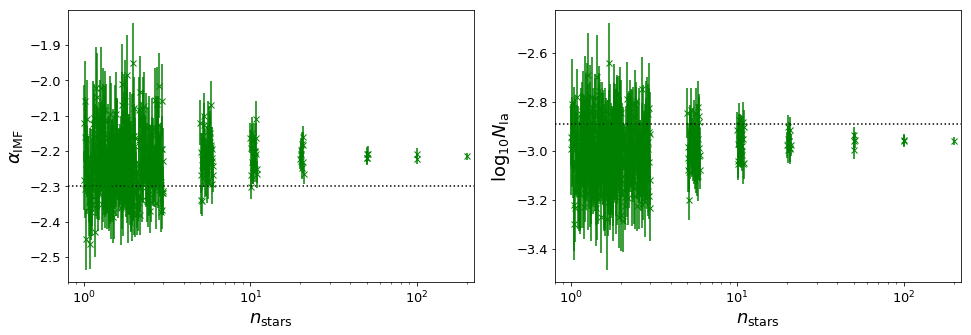

In [211]:
all_Lambdas = dat.f.Lambdas
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
FS=16
vmin,vmax=0.8,220
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5));

for ind in [0,1]:
    ax[ind].set_xscale('log')
    for i in range(len(all_Lambdas)):
        for j in range(len(all_Lambdas[i])):
            lo,med,up = np.percentile(all_Lambdas[i][j][:,ind],[15.865,50.,84.135])
            ax[ind].errorbar(n_stars[i]*(1.+0.005*j),med,c='g',
                             yerr=np.asarray([med-lo,up-med]).reshape(1,2),marker='x')
    
    ax[ind].set_ylabel(labels[ind],fontsize=FS+2)
    ax[ind].set_xlabel(r'$n_\mathrm{stars}$',fontsize=FS+2)
    ax[ind].set_xscale('log');
    for label in (ax[ind].get_xticklabels()+ax[ind].get_yticklabels()):
        label.set_fontsize(fontsize=FS-3)
    
    ax[ind].hlines(true[ind],vmin,vmax,linestyles=':')
    ax[ind].set_xlim([vmin,vmax]);
    

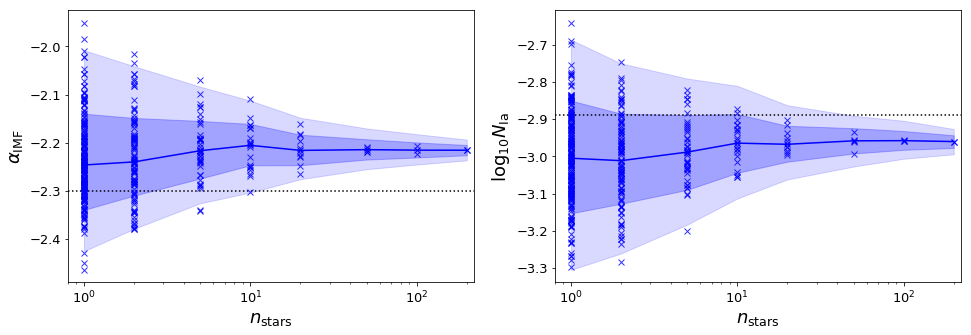

In [212]:
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5));

all_Lambdas = dat.f.Lambdas

med,lo,up,lo2,up2,sample_lo,sample_hi=[np.zeros((len(n_stars),2)) for _ in range(7)]
for i in range(len(n_stars)):
    theseL=all_Lambdas[i]
    lowL2,lowL,medianL,upL,upL2 = [[np.percentile(L,p,axis=0) for L in theseL] for p in [2.275,15.865,50.,84.135,97.725]]
    up[i]=np.median(upL,axis=0)
    lo[i]=np.median(lowL,axis=0)
    up2[i]=np.median(upL2,axis=0)
    lo2[i]=np.median(lowL2,axis=0)
    med[i]=np.median(medianL,axis=0)
    sample_lo[i],sample_hi[i]=np.percentile(medianL,[15.865,84.135],axis=0)


for ind in [0,1]:
    ax[ind].set_xscale('log')
    ax[ind].errorbar(n_stars,med[:,ind],yerr=0.,#[med[:,ind]-sample_lo[:,ind],sample_hi[:,ind]-med[:,ind]],
                     marker='x',c='b')
    ax[ind].fill_between(n_stars,lo[:,ind],up[:,ind],alpha=0.25,color='b')
    ax[ind].fill_between(n_stars,lo2[:,ind],up2[:,ind],alpha=0.15,color='b')

    for i in range(len(n_stars)):
        for j in range(len(all_Lambdas[i])):
            ax[ind].errorbar(n_stars[i],np.median(all_Lambdas[i][j],axis=0)[ind],marker='x',c='b',alpha=0.8)

    ax[ind].set_ylabel(labels[ind],fontsize=FS+2)    
    ax[ind].set_xlabel(r'$n_\mathrm{stars}$',fontsize=FS+2)
    ax[ind].set_xscale('log');
    for label in (ax[ind].get_xticklabels()+ax[ind].get_yticklabels()):
        label.set_fontsize(fontsize=FS-3)

    ax[ind].hlines(true[ind],vmin,vmax,linestyles=':')
    ax[ind].set_xlim([vmin,vmax]);


In [213]:
fig.savefig('/home/oliverphilcox/ChempyMulti/Plots_New/%s_HMC_v5.pdf'%name_str,bbox_inches='tight')

### Look at element errors

In [257]:
all_Errs=dat.f.Errors

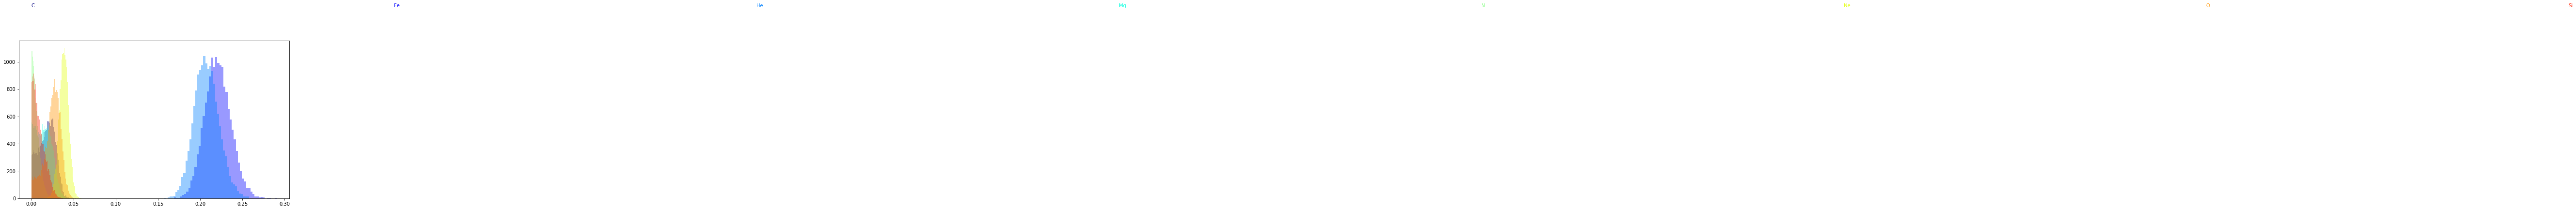

In [258]:
n_index = -1
els = ['C','Fe','He','Mg','N','Ne','O','Si'] # TNG elements
these_Errs=np.mean(all_Errs[n_index],axis=0)
plt.figure(figsize=(10,6))
for el in range(8):
    col = plt.cm.jet(el/8)
    plt.hist(these_Errs[:,el],bins=50,alpha=0.4,color=col);
    plt.text(el/(8*max(these_Errs.ravel())),1400,'%s'%els[el],color=col)

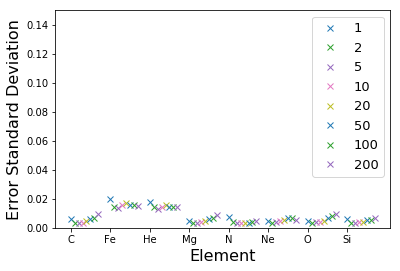

In [259]:
for n_index in range(len(n_stars)):
    these_Errs=np.mean(all_Errs[n_index],axis=0)
    plt.errorbar(np.arange(len(els))+float(n_index)/10.,np.std(these_Errs,axis=0),marker='x',ls='',label='%d'%n_stars[n_index])
    plt.errorbar(els,-1.)
    plt.ylim([0.,0.15])
    plt.ylabel('Error Standard Deviation',fontsize=FS);plt.xlabel('Element',fontsize=FS);
    plt.legend(fontsize=FS-3);

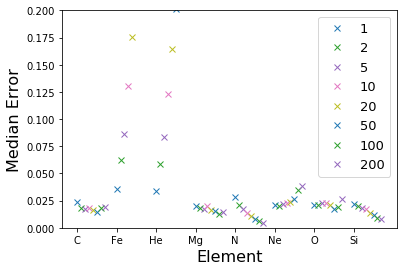

In [260]:
for n_index in range(len(n_stars)):
    these_Errs=np.mean(all_Errs[n_index],axis=0)
    plt.errorbar(np.arange(len(els))+float(n_index)/10.,np.median(these_Errs,axis=0),marker='x',ls='',label='%d'%n_stars[n_index])
    plt.errorbar(els,-1.)
    plt.ylim([0.,0.2])
    plt.ylabel('Median Error',fontsize=FS);plt.xlabel('Element',fontsize=FS);
    plt.legend(fontsize=FS-3);